# TP6 - Clasificador de imágenes con perceptrón

Guarda una copia de este cuaderno en tu Google Drive para poder editarla y ejecutarla.

El propio cuaderno será tu informe del trabajo. Puedes añadir tantas secciones de código y de texto como consideres necesario para resolver todos los ejercicios propuestos y analizar los resultados obtenidos. Una vez hayas terminado, descarga el notebook en formato ipynb y súbelo a Moodle en la tarea habilitada para el TP6 con el nombre NIP_TP6_MLP.ipynb

Es **obligatorio** que se **guarden los resultados de la evaluación** de cada celda de código (para no tener que volver a ejecutarlas). Por defecto los notebooks estan configurados así (Edit→Notebook Settings → NUNCA actives: Omit code cell output when saving this notebook) 

Imports necesarios para ejecutar el trabajo

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from keras.callbacks import EarlyStopping
import time
import numpy as np
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    fig, axs = plt.subplots(1, 2,  figsize=(12, 6))
    for l in loss_list:
        axs[0].plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        axs[0].plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    axs[0].set(title='Loss', xlabel='Epochs', ylabel='Loss')
    axs[0].grid()
    axs[0].legend()
    
    ## Accuracy
    for l in acc_list:
        axs[1].plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        axs[1].plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    axs[1].set(title='Accuracy', xlabel='Epochs', ylabel='Accuracy')
    axs[1].grid()
    axs[1].legend()
    plt.show()

Carga del dataset MNIST

In [3]:
verbose = True

print('Loading MNIST dataset...')
# Problem dimensions
img_rows, img_cols = 28, 28
num_pixels = img_rows * img_cols
num_classes = 10
# The data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, num_pixels)
x_test = x_test.reshape(10000, num_pixels)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.np_utils.to_categorical(y_test,  num_classes)

np.random.seed(0)
p = np.arange(x_train.shape[0])
np.random.shuffle(p)
x_train = x_train[p]
y_train = y_train[p]

Loading MNIST dataset...
11501568/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


Ejemplo de definición de la arquitectura de una red y de los parámetros de la optimización.

In [4]:
# Función para parar cuando ya no mejora el error en los datos de validacion
earlystop=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

# Perceptron de un solo nivel
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(num_pixels,)))
model.compile(loss='categorical_crossentropy', optimizer=Adam(),  metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Código para entrenar la red neuronal utilizando la función FIT

Observa como incluye un argumento para hacer separación de datos de validación



Epoch 1/20
422/422 [==============================] - 3s 3ms/step - loss: 0.6987 - accuracy: 0.8253 - val_loss: 0.4137 - val_accuracy: 0.8880
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3714 - accuracy: 0.9003 - val_loss: 0.3445 - val_accuracy: 0.9037
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3255 - accuracy: 0.9111 - val_loss: 0.3173 - val_accuracy: 0.9120
Epoch 4/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3043 - accuracy: 0.9161 - val_loss: 0.3036 - val_accuracy: 0.9145
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2913 - accuracy: 0.9190 - val_loss: 0.2942 - val_accuracy: 0.9180
Epoch 6/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2828 - accuracy: 0.9215 - val_loss: 0.2892 - val_accuracy: 0.9185
Epoch 7/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2763 - accuracy: 0.9238 - val_loss: 0.2879 - val_accuracy: 0.9178
Epoch 

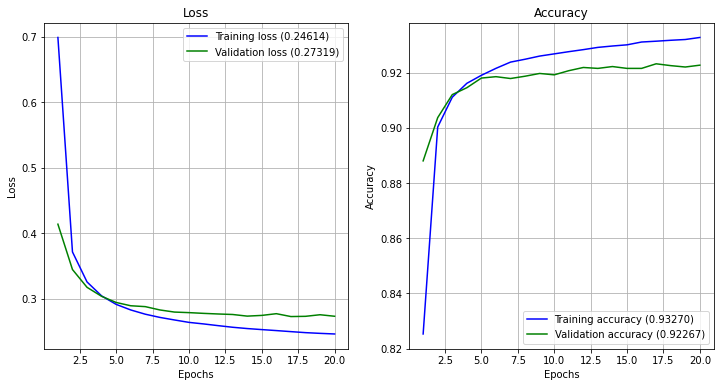

In [ ]:
t0 = time.perf_counter()
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.1,
                    callbacks=[earlystop],
                    verbose=verbose)

train_time = time.perf_counter() - t0
print('%s %.3f%s' %  ('Training time: ', train_time, 's') )
plot_history(history)

Preguntas a responder de la celda anterior

1 - ¿Qué representan los parámetros batch_size y epochs? Respuesta (dos líneas max).

2 - Explica las dos gráficas que se muestran al finalizar el entrenamiento.

1 - Definiciones:
- **batch_size**: Representa el numero de muestras que van a ser propagadas a través de la red. En vez de entrenar de uno en uno se entrena en grupos.
- **epochs**: Numero de veces que se entrena la red para poder realizar reajustes de los parametros.

2 - Analisis de las gráficas
- La gráfica de "Loss" muestra como se han ido reajustando los pesos de la red de tal manera que el error ha ido disminuyendo según iban pasando las epocas.
Al principio podemos ver como cae mas rápido debido a que los errores eran mayores y había que reajustar más los parametros, pero segun ha ido aprendiendo los errores han ido disminuyendo y los ajustes han ido siendo cada vez menores. 
- La gráfica de "Accuracy" muestra como varia el número de predicciones correctas respecto al número de muestras totales del data set...


Evaluación de la red

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    #plt.tight_layout()


def plot_mnist_confusion_matrix(y_test, y_pred, normalize=False):
    class_names=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    y_tst = [np.argmax(y) for y in y_test]
    y_prd = [np.argmax(y) for y in y_pred]

    cnf_matrix = confusion_matrix(y_tst, y_prd)

    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          normalize=normalize)

Accuracy train:  93.22%
Accuracy test:   92.83%
Confusion matrix, without normalization


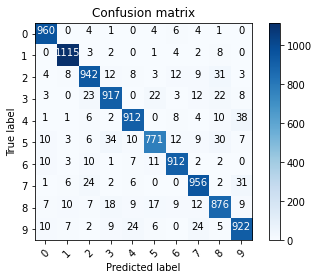

In [ ]:
# Evaluar la red
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score[1], '%'))

y_pred = model.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred, normalize=False)
# Standard confusion matrix plot
# cm=confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
# plt.imshow(cm, cmap='Blues')

Preguntas a responder de la celda anterior

1 - Explica la gráfica que se muestra

**Trabajo práctico**: incluye a continuación las secciones de código para probar las diferentes redes. 
No incluyas una sección para cada red que pruebes. El notebook que entregues deberá incluir:


1.   La mejor red obtenida para el caso de una capa
2.   La mejor red obtenida para el caso de dos capas
3.   La mejor red obtenida para el caso de tres capas
4.   Ejemplo de red en la que se produzca sobreajuste al entrenar
5.   Modificación de la red anterior utilizando técnicas para evitar el sobreajuste
6.   Incluye en una sección de texto una tabla en la que aparezca resumido el conjunto de pruebas realizado y los resultados obtenidos en cada caso (nº capas, nº neuronas, accuracy, técnicas de sobreajuste, etc.). Incluye en esta sección también las conclusiones obtenidas del trabajo.
7.   Recuerda mostrar y comentar algún ejemplo de imagen mal clasificada por la red que mejor se comporte.

1 - Matriz de confusión: "Herramienta que permite la visualización del desempeño de un algoritmo que se emplea en aprendizaje supervisado".
- La columnas de esta representan el número de predicciones de cada clase.
- Las filas representan las instancias de la clase real.
por poner un ejemplo, para el caso del número "1" se ve como es capaz de identificar casi todos los 1's auqnue a veces confunde estos con algún numero perteneciente a esta lista: [2,3,5,6,7,8], bien es cierto que la cantidad de unos que no es capaz de reconocer es irrelevante frente a la cantidad de unos que si reconoce.

In [6]:
# Docs
# Optimizadores   -> https://keras.io/api/optimizers/           -> rmsprop, adam, sgd
# F(x) activacion -> https://keras.io/api/layers/activations/   -> sigmoid, relu softmax

# Función para parar cuando ya no mejora el error en los datos de validacion
earlystop=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

def printBars(labels, training_means, validation_means):
  x = np.arange(len(labels))  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_means, width, label='Training')
  rects2 = ax.bar(x + width/2, validation_means, width, label='Validation')
  score_label = np.arange(0, 1.1, 0.1)

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('%')
  ax.set_title('% Accuracy')
  ax.legend()
  ax.set_xlabel("optimizers")
  # inserting x axis label
  ax.set_xticks(x)
  ax.set_xticklabels(labels)

  # inserting y axis label
  ax.set_yticks(score_label)
  ax.set_yticklabels(score_label)

  fig.tight_layout()

  plt.show()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
422/422 [==============================] - 2s 3ms/step - loss: 0.6308 - accuracy: 0.8422 - val_loss: 0.3705 - val_accuracy: 0.8978
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3378 - accuracy: 0.9066 - val_loss: 0.3217 - val_accuracy: 0.9093
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3058 - accuracy: 0.9152 - val_loss: 0.3033 - val_accuracy: 0.9160
Epoch 4/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2913 - accuracy: 0.9190 - val_loss: 0.2931 - val_accuracy: 0.9175
Epoch 5/20


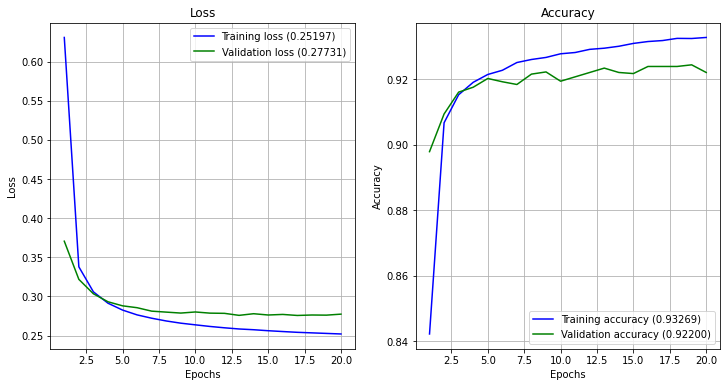

In [ ]:
# Creacion
modelo = keras.Sequential([ keras.layers.Dense(10, activation="sigmoid", input_shape=(num_pixels,)) ])
# Compilacion
modelo.compile( loss='categorical_crossentropy', optimizer="rmsprop", metrics=['accuracy'] )
modelo.summary()
# Entrenamiento
t0 = time.perf_counter()
history = modelo.fit(
  x_train, y_train, batch_size=128, epochs=20, validation_split=0.1,
  callbacks=[earlystop], verbose=True
)
train_time = time.perf_counter() - t0
print('%s %.3f%s' %  ('Training time: ', train_time, 's') )
plot_history(history)

# 1 capa

|**configuration**|**training-loss**|**training-accuracy**|**validation-loss**|**validation-accuracy**|
|-|-|-|-|-|
|**rmsprop - sigmoid**|0.2520|0.9327|0.2773|0.9220|
|rmsprop - relu       |NaN   |0.4735|NaN   |0.4963|
|rmsprop - softmax    |0.2521|0.9322|0.2761|0.9253|
|adam - sigmoid       |0.2458|0.9326|0.2718|0.9228|
|adam - relu          |NaN   |0.8609|NaN   |0.8616|
|adam - softmax       |0.2462|0.9319|0.2719|0.9236|
|sgd - sigmoid        |0.3591|0.9009|0.3576|0.9036|
|sgd - relu           |NaN   |0.8206|NaN   |0.8450|
|sgd - softmax        |0.3613|0.9008|0.3595|0.9021|
 
 En base a las pruebas realizadas, yo diria que la mejor combinación para el caso de una red con una sola capa es el que usa como optimizador "rmsprop" y como función de activación la "sigmoid" ya que muestran los valores de accuracy más altos.

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_103 (Dense)           (None, 100)               78500     
                                                                 
 dense_104 (Dense)           (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
422/422 [==============================] - 2s 3ms/step - loss: 0.6801 - accuracy: 0.8440 - val_loss: 0.3514 - val_accuracy: 0.9033
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2993 - accuracy: 0.9184 - val_loss: 0.2668 - val_accuracy: 0.9225
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2392 - accuracy: 0.9331 - val_loss: 0.2244 - val_accuracy: 0.9367
Epoch 4/20
422/422 

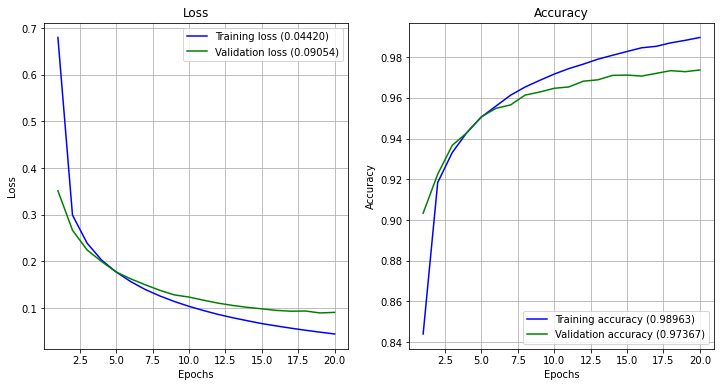

In [ ]:
modelo = keras.Sequential([ 
  keras.layers.Dense(100, activation="sigmoid", input_shape=(num_pixels,)),
  #keras.layers.Dropout(0.1),  # desactiva un 10% de las neuronas aleatoriamente
  keras.layers.Dense(10, activation="softmax"),
])

modelo.compile( loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'] )
modelo.summary()

t0 = time.perf_counter()
history = modelo.fit(
  x_train, y_train, batch_size=128, epochs=20, validation_split=0.1,
  callbacks=[earlystop], verbose=True
)
train_time = time.perf_counter() - t0
print('%s %.3f%s' %  ('Training time: ', train_time, 's') )
plot_history(history)

# 2 capas
- La ultima capa es una softmax con 10 neuronas
- Para evitar el sobreajuste se ha utilizado el callback de earlystop

|**configuration**|**training-loss**|**training-accuracy**|**validation-loss**|**validation-accuracy**|
|-|-|-|-|-|
|rmsprop - sigmoid[25]  |0.1387|0.9601|0.1661|0.9508|
|rmsprop - relu[25]     |0.0890|0.9744|0.1355|0.9663|
|rmsprop - sigmoid[50]  |0.0797|0.9774|0.1149|0.9663|
|rmsprop - relu[50]     |0.0367|0.9902|0.0920|0.9767|
|rmsprop - sigmoid[75]  |0.0642|0.9821|0.1002|0.9697|
|rmsprop - relu[75]     |0.0280|0.9929|0.0921|0.9765|
|rmsprop - sigmoid[100] |0.0491|0.9868|0.0845|0.9753|
|rmsprop - relu[100]    |0.0183|0.9954|0.0882|0.9790|
|adam - sigmoid[25]     |0.1239|0.9653|0.1568|0.9568|
|adam - relu[25]        |0.0844|0.9754|0.1273|0.9627|
|adam - sigmoid[50]     |0.0781|0.9788|0.1207|0.9638|
|adam - relu[50]        |0.0353|0.9909|0.0982|0.9728|
|adam - sigmoid[75]     |0.0540|0.9865|0.0987|0.9705|
|adam - relu[75]        |0.0190|0.9960|0.0847|0.9763|
|**adam - sigmoid[100]**|0.0442|0.9896|0.0905|0.9737|
|adam - relu[100]       |0.0124|0.9976|0.0871|0.9780|

En mi opinión la mejor configuración optenida para esta red seria la marcada en negrita ya que en primer lugar y al igual que las otras muestra unos valores de accuracy bastante buenos pero a diferencia de las otras, muestra una mayor "cercania" o similitud en como crecen las funciones mostrando asi que la red ha sido correctamente entrenada y que no ha aprendido los valores de memoria.

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 25)                19625     
                                                                 
 dense_97 (Dense)            (None, 75)                1950      
                                                                 
 dense_98 (Dense)            (None, 10)                760       
                                                                 
Total params: 22,335
Trainable params: 22,335
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
422/422 [==============================] - 2s 4ms/step - loss: 0.5079 - accuracy: 0.8546 - val_loss: 0.2761 - val_accuracy: 0.9185
Epoch 2/30
422/422 [==============================] - 1s 3ms/step - loss: 0.2331 - accuracy: 0.9314 - val_loss: 0.2141 - val_accuracy: 0.9355
Epoch 3/30
422/422 [=========

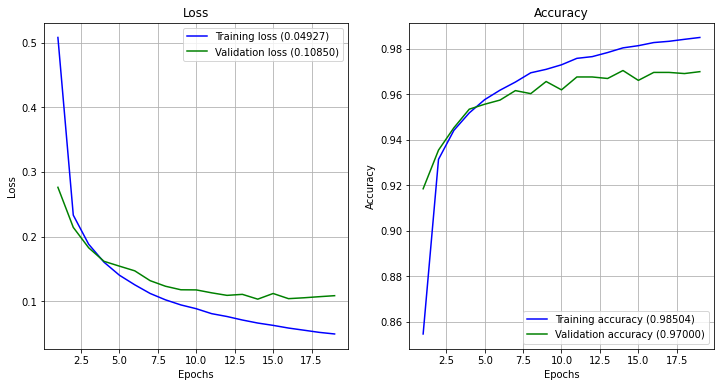

In [ ]:
modelo = keras.Sequential([ 
  keras.layers.Dense(25, activation="relu", input_shape=(num_pixels,)),
  # keras.layers.Dropout(0.1),
  keras.layers.Dense(75, activation="relu"),
  # keras.layers.Dropout(0.1),
  keras.layers.Dense(10, activation="softmax"),
])

modelo.compile( loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'] )
modelo.summary()

t0 = time.perf_counter()
history = modelo.fit(
  x_train, y_train, batch_size=128, epochs=30, validation_split=0.1,
  callbacks=[earlystop], verbose=True
)
train_time = time.perf_counter() - t0
print('%s %.3f%s' %  ('Training time: ', train_time, 's') )
plot_history(history)

# 3 capas
- La ultima capa es una softmax con 10 neuronas
- Para evitar el sobreajuste se ha utilizado el callback de earlystop

|**configuration**|**training-loss**|**training-accuracy**|**validation-loss**|**validation-accuracy**|
|-|-|-|-|-|
|relu[25] - relu[25]    |0.0607|0.9818|0.1192|0.9672|
|relu[25] - relu[50]    |0.0377|0.9882|0.1337|0.9670|
|**relu[25] - relu[75]**|0.0493|0.9850|0.1085|0.9700|
|relu[25] - relu[100]   |0.0389|0.9881|0.1159|0.9688|
|relu[50] - relu[25]    |0.0350|0.9894|0.1078|0.9708|
|relu[50] - relu[50]    |0.0183|0.9946|0.1125|0.9702|
|relu[50] - relu[75]    |0.0209|0.9935|0.1106|0.9730|
|relu[50] - relu[100]   |0.0282|0.9909|0.1038|0.9720|
|relu[75] - relu[25]    |0.0185|0.9947|0.1020|0.9725|
|relu[75] - relu[50]    |0.0263|0.9921|0.0969|0.9753|
|relu[75] - relu[75]    |0.0160|0.9952|0.1022|0.9763|
|relu[75] - relu[100]   |0.0228|0.9930|0.0870|0.9755|
|relu[100] - relu[25]   |0.0204|0.9944|0.0962|0.9747|
|relu[100] - relu[50]   |0.0114|0.9970|0.1002|0.9767|
|relu[100] - relu[75]   |0.0107|0.9966|0.1091|0.9745|
|relu[100] - relu[100]  |0.0155|0.9952|0.0963|0.9747|

En mi opinión, creo que el mejor modelo para el perceptron con 3 capas en base a los resultados que he optenido al realizar distintas pruebas es el que usa en sus 2 capas ocultas la función de activación relu, (la primera capa con 25 neuronas y la segunda con 75) ya que a pesar de no mostrar gran mejoría con el resto podemos ver como la diferencia entre los valores de test y de validación son un poco menores que en el resto de los casos queriendo decir así que los resultados obtenidos no ha sido porque se haya memorizado tanto los datos del entrenamiento.

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 50)                39250     
                                                                 
 dense_117 (Dense)           (None, 50)                2550      
                                                                 
 dense_118 (Dense)           (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________
Training time:  55.835s


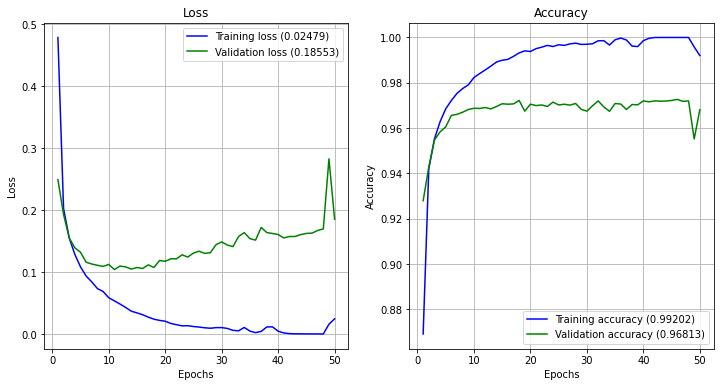

In [ ]:
# Modelo forzado para el sobreajuste
modelo = keras.Sequential([ 
  keras.layers.Dense(50, activation="relu", input_shape=(num_pixels,)),
  keras.layers.Dense(50, activation="relu"),
  keras.layers.Dense(10, activation="softmax"),
])

modelo.compile( loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'] )
modelo.summary()

t0 = time.perf_counter()
history = modelo.fit(
  x_train, y_train, batch_size=128, epochs=50, validation_split=0.25, verbose=True
)
train_time = time.perf_counter() - t0
print('%s %.3f%s' %  ('Training time: ', train_time, 's') )
plot_history(history)

En este modelo se puede apreciar que se produce un sobreajuste bastante claro, esto lo podemos apreciar por distintos motivos...

1. El valor del training accuracy es  muy cercano a 1
2.  Las funciones de loss de entrenamiento y de validación cada vez son mas distantes
3. Las funciones de accuracy para el entrenamiento y la validación son también cada vex más distantes

El sobre ajuste se ha producido debido a que se ha forzado a la red a entrenar por mas épocas de las que debería sin el callback de earlystop por lo que ha seguido entrenando hasta acabar todas las épocas y por lo que se ve en las gráficas ha sido sificiente para ver que se ha memorizado los datos de entrenamiento resultandole complicado detectar aquellas imagenes con las que no ha sido entrenada.

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_119 (Dense)           (None, 50)                39250     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_120 (Dense)           (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_121 (Dense)           (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________
Epoch 00033: early stopping
Training time:  38.17

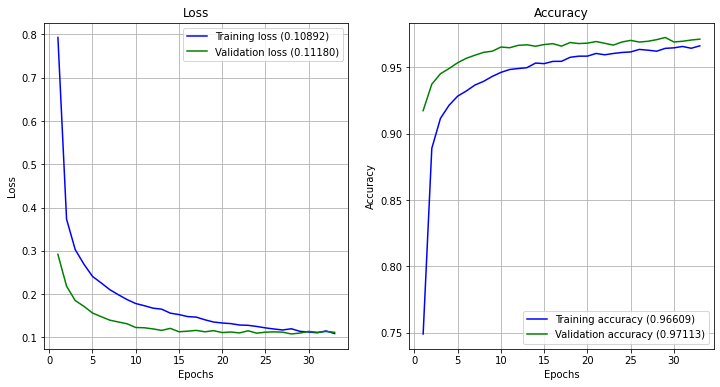

In [ ]:
# Modelo controlando el sobreajuste anteriormente forzado
modelo = keras.Sequential([ 
  keras.layers.Dense(50, activation="relu", input_shape=(num_pixels,)),
  keras.layers.Dropout(0.25),
  keras.layers.Dense(50, activation="relu"),
  keras.layers.Dropout(0.25),
  keras.layers.Dense(10, activation="softmax"),
])

modelo.compile( loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'] )
modelo.summary()

t0 = time.perf_counter()
history = modelo.fit(
  x_train, y_train, batch_size=128, epochs=50, validation_split=0.25, 
  callbacks=[earlystop], verbose=False
)
train_time = time.perf_counter() - t0
print('%s %.3f%s' %  ('Training time: ', train_time, 's') )
plot_history(history)

Para evitar el sobre ajuste anteriormente forzado se han utilizado distintas tecnicas:
1. callbacks -> earlystop: funcion que para cuando ya no mejora el error
2. capas de dropout: desactivan aleatoriamente un % de neuronas para quitar entradas de datos. menos datos -> menos entrenamiento.

Como se puede ver ahora, las gráficas de loss y de accuracy mustran funciones de entrenamiento y validación mas similares que las mostradas en las gráficas anteriores teniendo asi 2 funciones de accuracy (entrenamiento y validación) que son mas proximas la una a la otra lo que indica que cuando la red recibe un parametro nuevo, esta es capaz de clasificarlo y lo mismo para el loss, cuando la red recibe un dato nuevo el error de este es muy similar al de entrenamiento.
